### Analyzing Factors Influencing U.S. Housing Prices Over the Past 20 Years

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('/content/Price Index.csv');
df.head()

,DATE,Price_index,Mortgage_rate,GDP,Inflation,Interest_rate,Unempl
0,01-01-2003,1.28,5.92,1.12,2.78,1.24,5.8
1,01-02-2003,1.29,5.84,NaN,2.70,1.26,5.9
2,01-03-2003,1.30,5.75,NaN,2.62,1.25,5.9
3,01-04-2003,1.31,5.81,1.13,2.45,1.26,6.0
4,01-05-2003,1.32,5.48,NaN,2.34,1.26,6.1


In [48]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2003-01-01 to 2023-01-12
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_index    252 non-null    float64
 1   Mortgage_rate  252 non-null    float64
 2   GDP            84 non-null     float64
 3   Inflation      252 non-null    float64
 4   Interest_rate  252 non-null    float64
 5   Unempl         252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [50]:
df.isnull().sum()

Price_index        0
Mortgage_rate      0
GDP              168
Inflation          0
Interest_rate      0
Unempl             0
dtype: int64

In [51]:
mean = df['GDP'].mean()
df['GDP'] = df['GDP'].fillna(mean)
df.isnull().sum()

Price_index      0
Mortgage_rate    0
GDP              0
Inflation        0
Interest_rate    0
Unempl           0
dtype: int64

In [52]:
correlation_matrix = df.corr()
price_correaltion = correlation_matrix['Price_index']
price_correaltion

Price_index      1.000000
Mortgage_rate    0.044934
GDP              0.511349
Inflation        0.774065
Interest_rate    0.353759
Unempl          -0.545946
Name: Price_index, dtype: float64

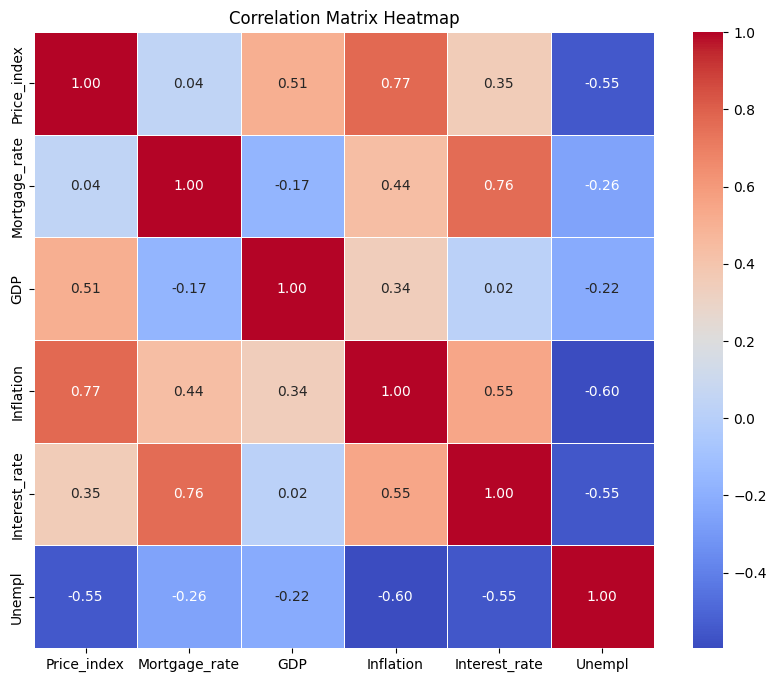

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#####**Price_index and Mortgage_rate: 0.044934**

#####**Value: 0.045**
#####**Interpretation:** This value is very close to 0, indicating a very weak positive linear relationship between Price_index and Mortgage_rate. Changes in the mortgage rate have little to no linear relationship with the price index. whcih make sense because higher mortgage rate = cheaper houses

#####**Price_index and GDP: 0.511349**

#####**Value: 0.511**
#####**Interpretation**: This value indicates a moderate **positive correlation. As GDP increases, there is a tendency for the price index to increase as well, suggesting a moderate linear relationship between the two.

#####**Price_index and Inflation: 0.774065**

#####**Value: 0.774**
#####**Interpretation**: This value indicates a strong positive correlation. A higher inflation rate is strongly associated with an increase in the price index. This suggests that inflation has a considerable linear relationship with the price index.

#####**Price_index and Interest_rate: 0.353759**

#####**Value: 0.354**
#####**Interpretation**: This value shows a weak to moderate positive correlation. There is a slight tendency for the price index to increase as interest rates increase, but the relationship is not very strong.


#####**Price_index and Unemployment: -0.545946**

#####**Value: -0.546**
#####**Interpretation**: This value indicates a moderate negative correlation. As unemployment increases, the price index tends to decrease. This suggests a moderate inverse relationship between unemployment and the price index.

### Model Prep

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
X = df[['Mortgage_rate', 'GDP', 'Inflation', 'Interest_rate', 'Unempl']]
y = df['Price_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [80]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.04681764144111621
R^2 Score: 0.6996414488414036


#####R² Score:0.6996
#####Indicates that about 70% of the variance in the target variable (Price_index) is explained by model.
#####An MSE of 0.0468 suggests that, on average, the squared error between model’s predictions and the actual values is quite small.

In [81]:
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficients: [-2.07747218e-01  3.02196729e-01  3.40628195e-01  8.41916501e-02
 -1.70206230e-04]
Intercept: 1.341839903705441


The coefficients in your model are:
*  Mortgage_rate: −0.2077
*  GDP: 0.3022
*  Inflation: 0.3406
*  Interest_rate: 0.0842
*  Unemployment: 0.0002

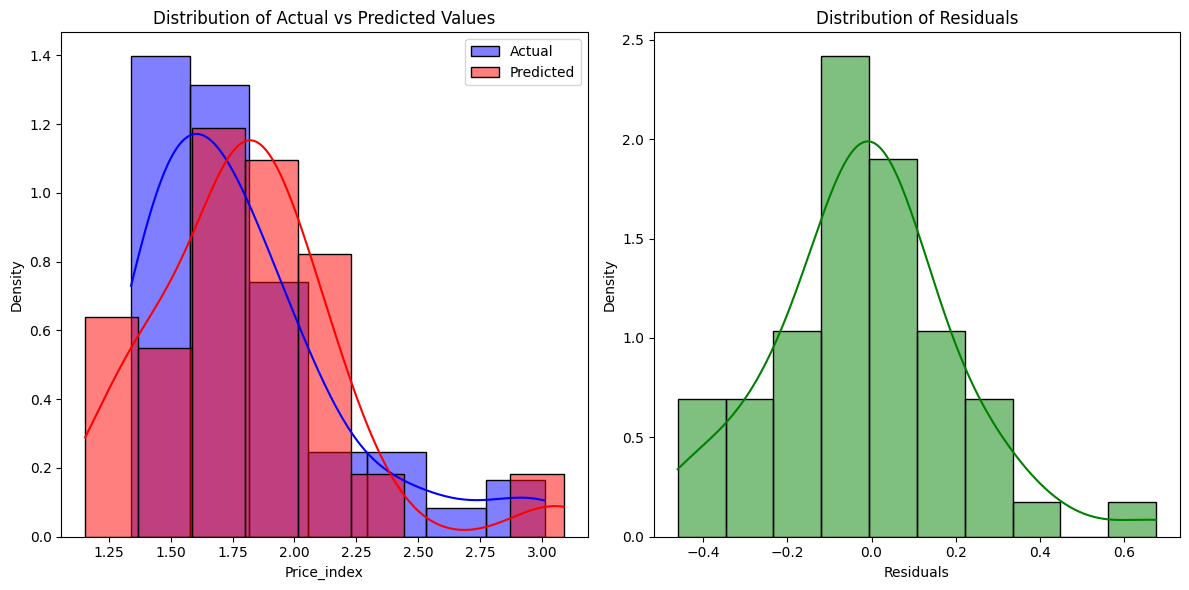

In [82]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# Distribution of Actual vs Predicted Values
plt.subplot(1, 2, 1)
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat='density')
sns.histplot(y_pred, color='red', label='Predicted', kde=True, stat='density')
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Price_index')
plt.legend()

# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, color='green', kde=True, stat='density')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [92]:
columns_of_interest = ['Inflation', 'Unempl', 'GDP']
df_subset = df[columns_of_interest]
correlation_matrix2 = df_subset.corr()

           Inflation    Unempl       GDP
Inflation   1.000000 -0.595754  0.339286
Unempl     -0.595754  1.000000 -0.220542
GDP         0.339286 -0.220542  1.000000


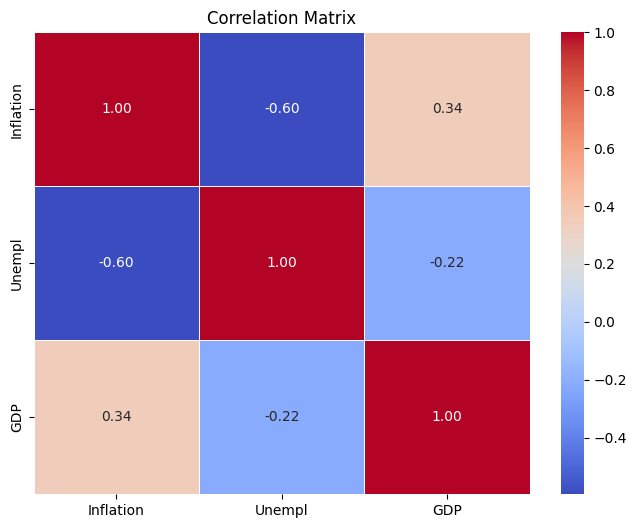

In [93]:
print(correlation_matrix2)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Conclusion : Economic factors such as GDP and interest rates significantly influence home prices tends to be higher along with slightly lower interest rate.
Mideian sale price is correalted with home price showing effect on home price movement.
inflation also playes the major role causing effect on almost everything including increaing in unemployment, decreasing in GDP cause to rasie higher interest rate.

Refrence : [Economicshelp Blog](https://www.economicshelp.org/blog/377/housing/factors-that-affect-the-housing-market/)

[Census gov](https://www.census.gov/topics/housing.html)

[BLS gov](https://www.bls.gov/)

Further Analysis : Price by demographic, cluster by age, gov policy and effect.